# <center> Where to focus a marketing campaign? </center>



## 💾 The data

#### Historic crowdfunding donations
- "category" - "Sports", "Fashion", "Technology", etc.
- "device" - the type of device used.
- "gender" - gender of the user.
- "age range" - one of five age brackets.
- "amount" - how much the user donated in Euros.

In [1]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('./data/crowdfunding.csv')
df.head(10)

,category,device,gender,age,amount
0,Fashion,iOS,F,45-54,61.0
1,Sports,android,M,18-24,31.0
2,Technology,android,M,18-24,39.0
3,Technology,iOS,M,18-24,36.0
4,Sports,android,M,18-24,40.0
5,Games,iOS,M,18-24,59.0
6,Fashion,android,F,45-54,58.0
7,Fashion,iOS,F,45-54,56.0
8,Technology,android,F,35-44,33.0
9,Games,iOS,F,18-24,44.0


## 💪 Challenge
[CLICK](#vis) Create a **single** visualization that the marketing manager can use to explore the data. Include: 


1. [CLICK](#three) What are the top three categories in terms of total donations? 
2. [CLICK](#dev) What device type has historically provided the most contributions?  
3. [CLICK](#age) What age bracket should the campaign target? 


 
[CLICK](#sec) (plus) The second best age range per category 

<a name="three"></a>
___
# <center> 1. TOP THREE CATEGORIES OF TOTAL DONATIONS </center>

In [2]:
 # List of categories 
cat = list(set(df["category"]))
cat

['Technology', 'Environment', 'Games', 'Sports', 'Fashion']

In [3]:
# List of the total sum of contributions.
list_amount_cat = []
for i in cat:
    list_amount_cat.append(sum(df[df["category"] == i]["amount"]))
list_amount_cat 

[162731.0, 162376.0, 165483.0, 163528.0, 159952.0]

In [4]:
# Dataframe of the two lists
cat_amount = {"category":cat, "amount": list_amount_cat}
df_cat_amount = pd.DataFrame(cat_amount)
df_c_a_sort = df_cat_amount.sort_values("amount", ascending = False)
df_c_a_sort

,category,amount
2,Games,165483.0
3,Sports,163528.0
0,Technology,162731.0
1,Environment,162376.0
4,Fashion,159952.0


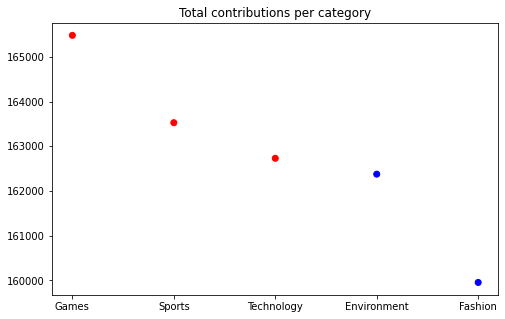

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,5)
colors = ["r", "r", "r", "b", "b"]
plt.scatter(df_c_a_sort["category"], df_c_a_sort["amount"], color = colors)
plt.title("Total contributions per category")
plt.show()                                            

<a name="dev"></a>
___
# <center> 2. DEVICE TYPE PROVIDED THE MOST CONTRIBUTIONS </center>

In [6]:
# List of devices type
dev = list(set(df["device"]))
dev

['iOS', 'android']

In [7]:
# List of total contributions per device type
list_amount_dev = []
for i in dev:
    list_amount_dev.append(sum(df[df["device"] == i]["amount"]))
list_amount_dev

[530525.0, 283545.0]

In [8]:
# Dataframe of the two lists
dev_amount = {"device":dev, "amount": list_amount_dev}
df_dev_amount = pd.DataFrame(dev_amount)
df_dev_amount.sort_values("amount", ascending = False)
df_dev_amount

,device,amount
0,iOS,530525.0
1,android,283545.0


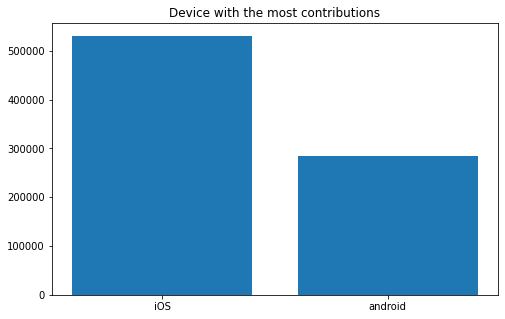

In [9]:
plt.rcParams["figure.figsize"] = (8,5)

plt.bar(df_dev_amount["device"], df_dev_amount["amount"])
plt.title("Device with the most contributions")
plt.show()

<a name="age"></a>
___
# <center> 3. AGE BRACKETS </center>

In [10]:
# List of age brackets
age = df["age"]
age_range = (list(set(age)))
age_range

['55+', '25-34', '18-24', '45-54', '35-44']

In [11]:
list_ages_range = []
list_ages_values = []

for j in age_range:
    contador = 0
    for k in age:
        if j == k:
            contador = contador + 1
    list_ages_range.append(j)
    list_ages_values.append(contador)

ages_values = {"age": list_ages_range, "values": list_ages_values}
df_ages_values = pd.DataFrame(ages_values).sort_values("values")
df_ages_values

,age,values
1,25-34,2496
0,55+,2515
3,45-54,2532
4,35-44,2676
2,18-24,10439


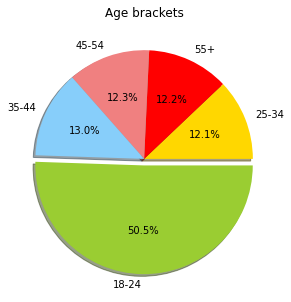

In [12]:
plt.rcParams["figure.figsize"] = (8,5)

colors = ['gold', 'red', 'lightcoral', 'lightskyblue', 'yellowgreen']
explode = (0, 0, 0, 0, 0.06)
# Plot
plt.pie(df_ages_values["values"], explode=explode, labels=df_ages_values["age"], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title("Age brackets")
plt.show()

<a name="vis"></a>
___
# <center> SINGLE VISUALIZATION </center> 
___

Text(0.5, 1.0, 'AGE BRACKETS')

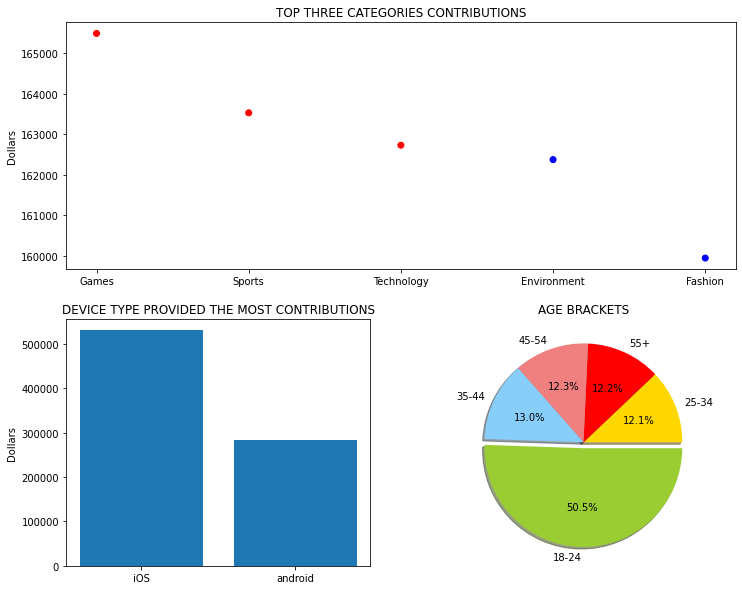

In [13]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
plt.rcParams["figure.figsize"] = (12,10)

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

pl.figure()

colors = ["r", "r", "r", "b", "b"]
ax = pl.subplot(gs[0, :]) # row 0, col 0
pl.scatter(df_c_a_sort["category"], df_c_a_sort["amount"], color = colors)
pl.ylabel("Dollars")
pl.title("TOP THREE CATEGORIES CONTRIBUTIONS")

ax = pl.subplot(gs[1, 0])
pl.bar(df_dev_amount["device"], df_dev_amount["amount"])
pl.ylabel("Dollars")
pl.title("DEVICE TYPE PROVIDED THE MOST CONTRIBUTIONS")


ax = pl.subplot(gs[1, 1]) # row 1, span all columns
colors = ['gold', 'red', 'lightcoral', 'lightskyblue', 'yellowgreen']
explode = (0, 0, 0, 0, 0.06)
pl.pie(df_ages_values["values"], explode=explode, labels=df_ages_values["age"], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
pl.title("AGE BRACKETS")

### FOCUS ON: 

- 18-24 years people, with iPhone in the categories: Games, Sports and Tech. 

<a name="sec"></a>
___
# <center> (plus) RANGE PER CATEGORY AND THE SECOND BEST </center>


_________________________________
Environment- first and second best
     age  values
2  18-24    2074
0    55+     510




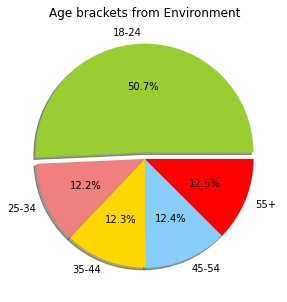

_________________________________
Fashion- first and second best
     age  values
2  18-24    2054
4  35-44     538




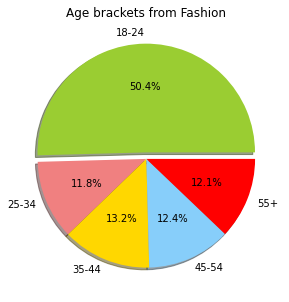

_________________________________
Games- first and second best
     age  values
2  18-24    2176
4  35-44     545




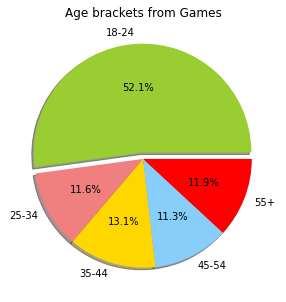

_________________________________
Sports- first and second best
     age  values
2  18-24    2112
4  35-44     530




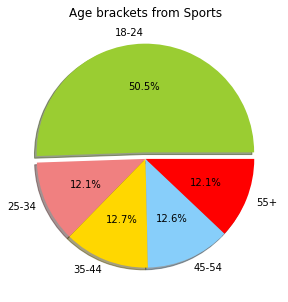

_________________________________
Technology- first and second best
     age  values
2  18-24    2023
4  35-44     561




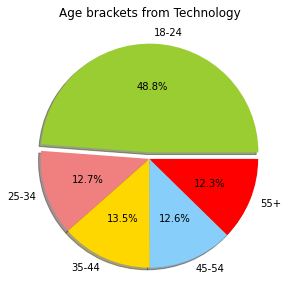

In [17]:
plt.rcParams["figure.figsize"] = (8,5)

def pie_category_age(age_cat):
    list_ages_range = []
    list_ages_values = []

    for j in age_range:
        contador = 0
        for k in age_cat:
            if j == k:
                contador = contador + 1
        list_ages_range.append(j)
        list_ages_values.append(contador)

    ages_values = {"age": list_ages_range, "values": list_ages_values}
    df_ages_values = pd.DataFrame(ages_values)
    return df_ages_values.sort_values("age")


list_sum = []
cat.sort()
for i in cat:
    age_cat = df[df["category"] == i]["age"]
    df_age_cat = pie_category_age(age_cat)
    # df_age_cat = df_age_cat.sort_values("values")
    # print(sum(df_age_cat["values"]))
    df_age_cat.sort_values("age")
    print("_________________________________")
    print(str(i) + "- first and second best")
    print(df_age_cat.sort_values("values", ascending = False).head(2))
    print("\n")
    #list_sum.append(sum(df_age_cat["values"]))
    colors = ['yellowgreen', 'lightcoral', 'gold', 'lightskyblue', 'red']
    explode = (0.06, 0, 0, 0, 0)
    plt.pie(df_age_cat["values"], explode=explode, labels=df_age_cat["age"], colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
    plt.title("Age brackets from " + i)
    plt.show()
    # plt.savefig("pie_" + i + ".jpg")
    plt.close()